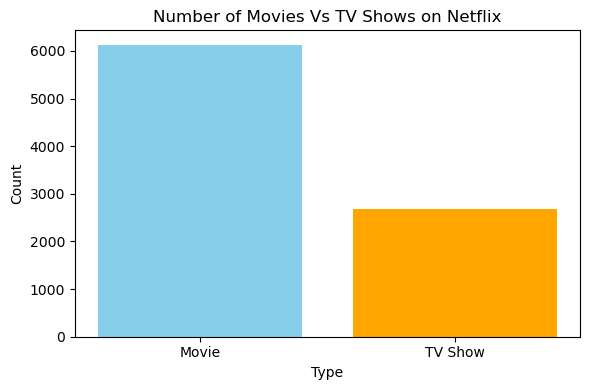

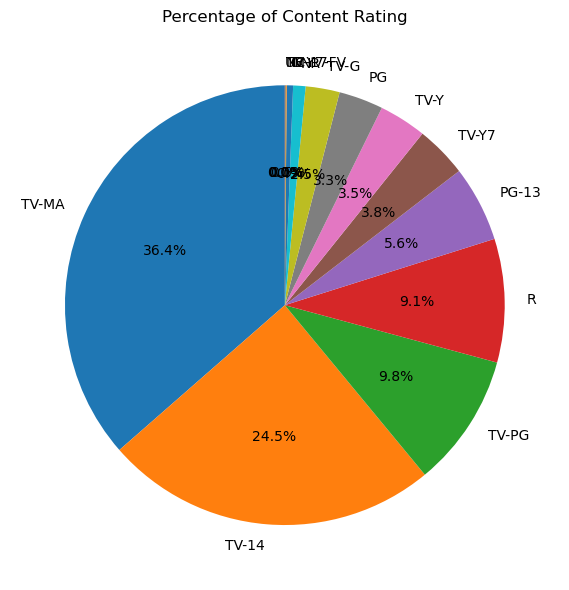

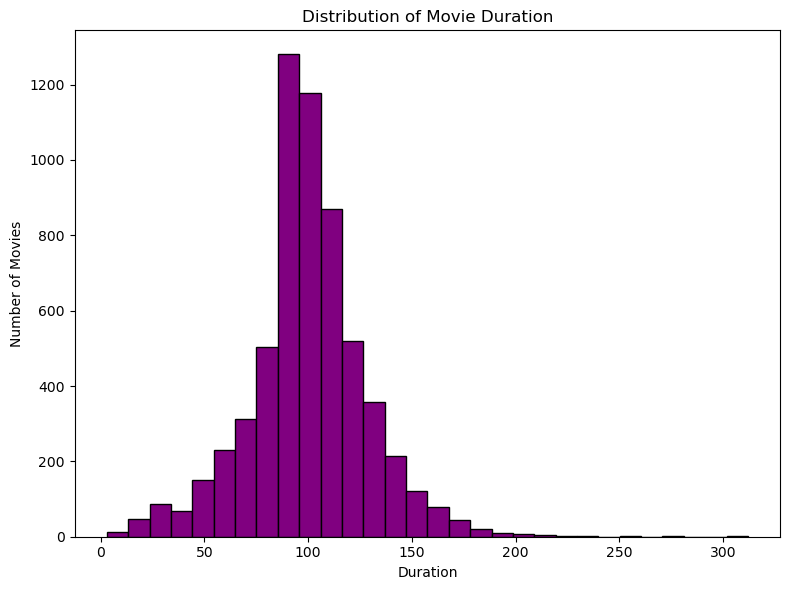

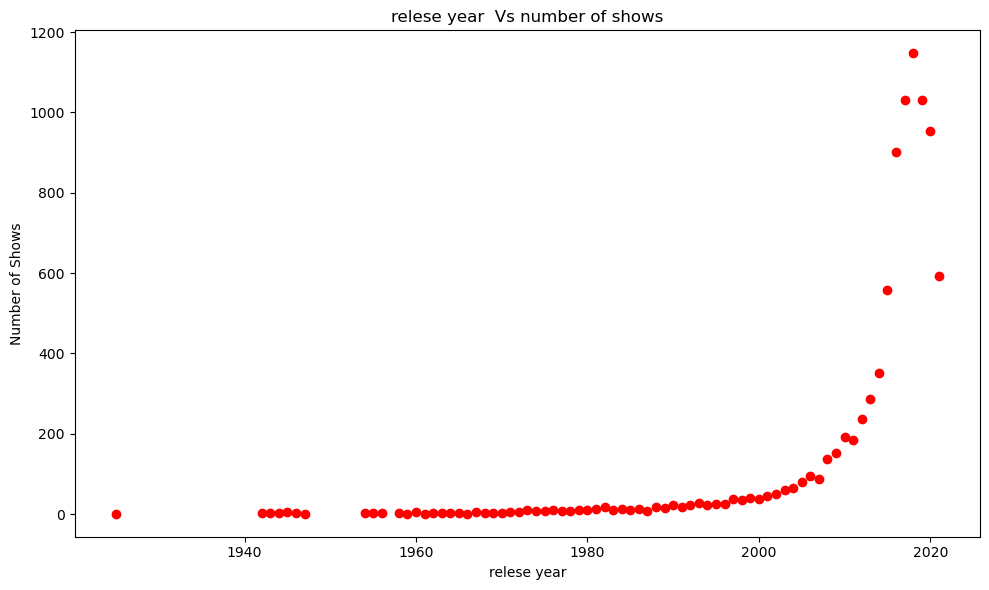

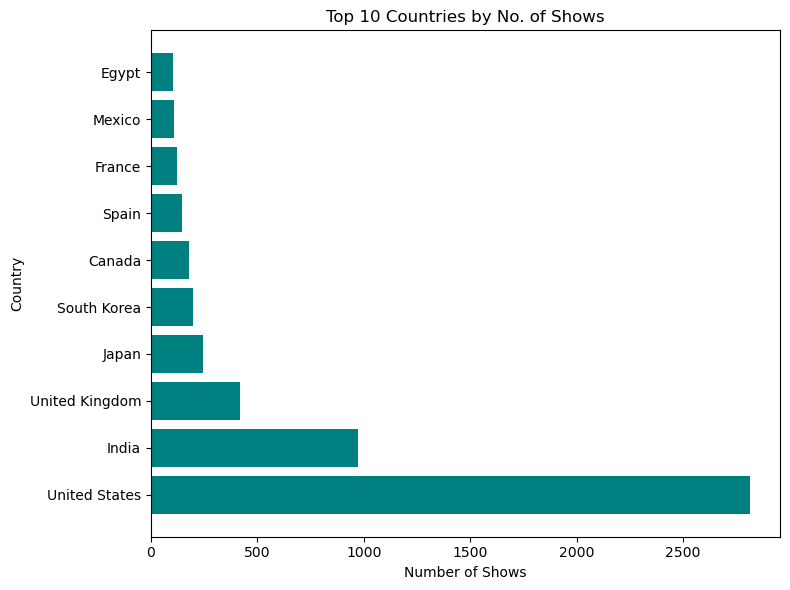

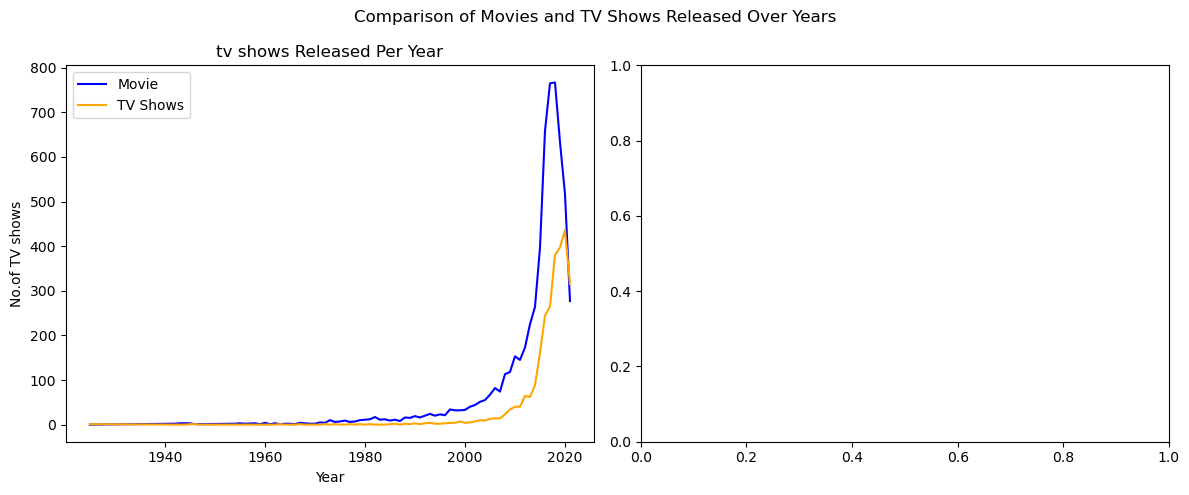

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

 #load the data
df= pd.read_csv('netflix_titles.csv')
#clean data
df = df.dropna(subset=['type', 'release_year', 'rating', 'duration'])
#barchart
type_counts= df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue' , 'orange'])
plt.title('Number of Movies Vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

#piechart
rating_counts =df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of Content Rating')
plt.tight_layout()
plt.savefig('content_rating_pie.png')
plt.show()

#histogram

movie_df =df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movies_duraton_histogram.png')
plt.show()

#scatter plot

release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color='red')
plt.title('relese year  Vs number of shows')
plt.xlabel('relese year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('relese_scatter.png')
plt.show()

#Barchart
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 6))  # Corrected figure size syntax
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by No. of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('horizontal_graph.png')  # Corrected spelling in filename
plt.show()

#subplot
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax=plt.subplots(1,2,figsize=(12,5))
#subplot for movie
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue',label='Movie')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('No.of Movies')
#subplot for tv shows
ax[0].plot(content_by_year.index,content_by_year['TV Show'],color='orange',label='TV Shows')
ax[0].set_title('tv shows Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('No.of TV shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')
plt.tight_layout()
ax[0].legend()
ax[0].legend()
plt.savefig('movies_tvshows_comp.png')